Python programming Project 
Dataset - the movie dataset
Contains data on more than 40,000 films and their ratings
First, let's understand what our data consists of.

In [1]:
import kagglehub 
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
main_path = kagglehub.dataset_download("rounakbanik/the-movies-dataset") # Downloading dataset

In [5]:
os.listdir(main_path) # Look at files in dataset

['links_small.csv',
 'links.csv',
 'credits.csv',
 'movies_metadata.csv',
 'ratings.csv',
 'ratings_small.csv',
 'keywords.csv']

In [7]:
movies_metadata = pd.read_csv(main_path + "/movies_metadata.csv")
movies_metadata.head().T

/var/folders/4w/760gzfq90fdb0dxy37stm58w0000gn/T/ipykernel_25469/4276047965.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv(main_path + "/movies_metadata.csv")


,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


The first criterion of the dataset is that the table below contains the average values, medians and standard deviations for at least three fields

In [10]:
movies_metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


Clearing the data - let's look at the number of empty values in the columns

In [13]:
print(len(movies_metadata))
movies_metadata.isnull().sum()

45466


adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Let's remove those films that lack imdb_id, original_language, popularity, revenue, runtime, vote_average, vote_count
These are the main columns and we don't need empty values in them. The other columns are important, but the absence of values in them is not so important.

In [16]:
movies_metadata = movies_metadata.dropna(subset=
                                         ['imdb_id', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count'])

Let's look at the distribution of ratings - read the table and build a graph

In [19]:
ratings = pd.read_csv(main_path + "/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


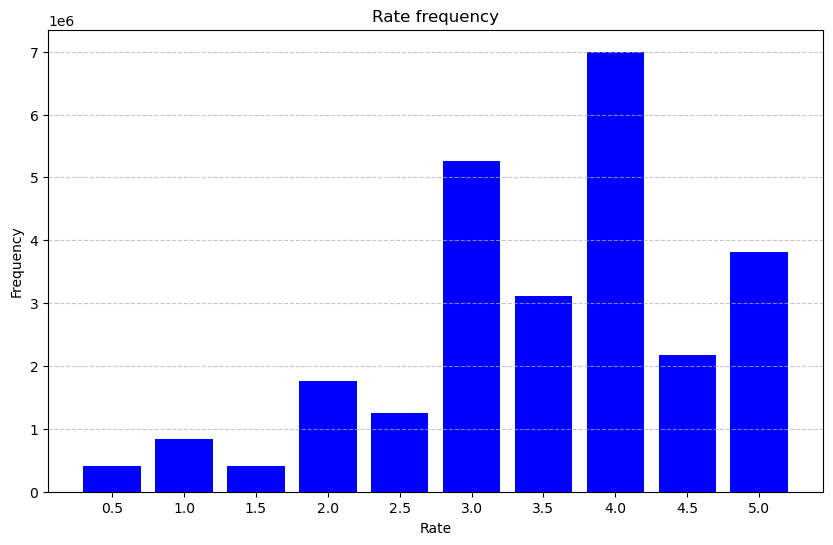

In [20]:
rating_distribution = ratings.groupby('rating')['rating'].count()

plt.figure(figsize=(10, 6))
plt.bar(
    rating_distribution.index,
    rating_distribution.values,
    color='blue',
    width=0.4                      
)

ticks = np.arange(0.5, 5.5, 0.5)      
plt.xticks(ticks)
plt.title("Rate frequency")
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It can be seen that most often users give a rating of 4. In general, viewers tend to give whole ratings(5, 4, 3, 2, 1), than not whole (4.5, 3.5, 2.5, 1.5, 0.5)
For the next graph, enter the column - profit (revenue minus budget)

In [22]:
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce')
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')
movies_metadata['profit'] = movies_metadata['revenue'] - movies_metadata['budget']
top_profit_movies = movies_metadata[['title', 'profit']].sort_values(by='profit', ascending=False).head(10)

Plotting the current of 10 profitable films

/var/folders/4w/760gzfq90fdb0dxy37stm58w0000gn/T/ipykernel_25469/759778543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit_movies['profit'], y=top_profit_movies['title'], palette='rocket')


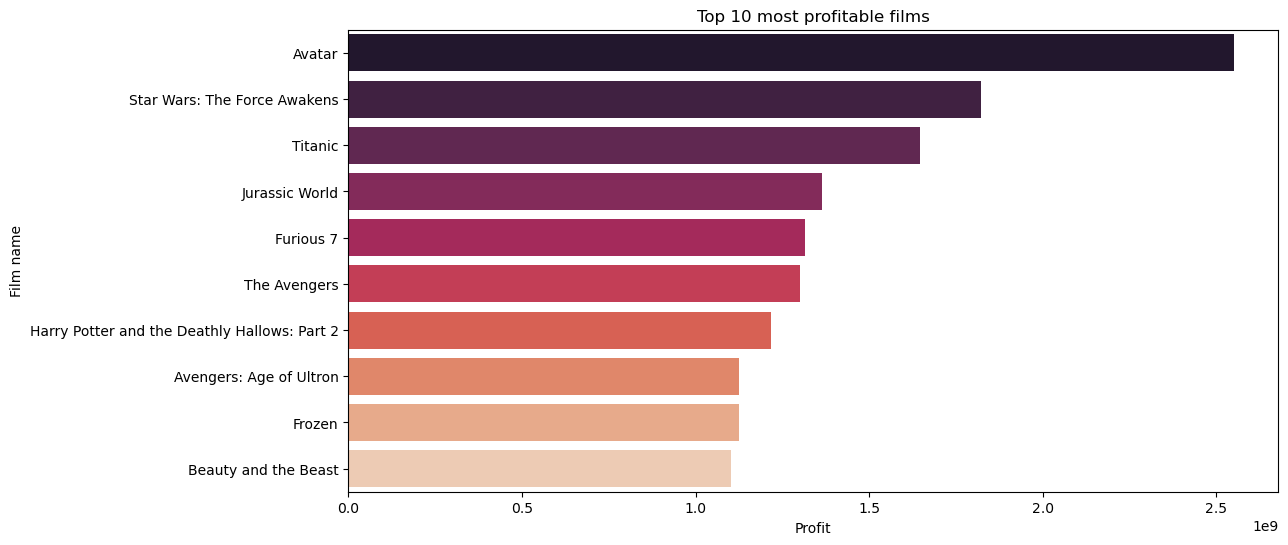

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_profit_movies['profit'], y=top_profit_movies['title'], palette='rocket')
plt.title("Top 10 most profitable films")
plt.xlabel("Profit")
plt.ylabel("Film name")
plt.show()

Another graph is the distribution of the duration of films

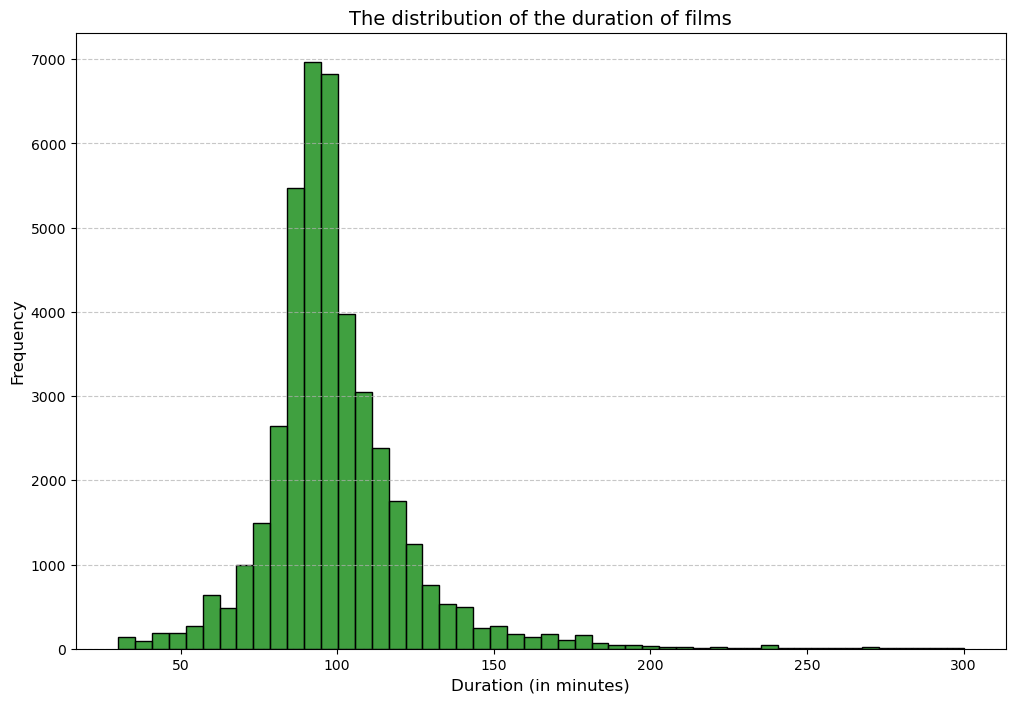

In [27]:
filtered_runtime = movies_metadata[movies_metadata['runtime'].between(30, 300)]['runtime']

plt.figure(figsize=(12, 8))  
sns.histplot(filtered_runtime, bins=50, color='green', orientation='horizontal') 
plt.title("The distribution of the duration of films", fontsize=14)
plt.xlabel("Duration (in minutes)", fontsize=12) 
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

Let's introduce 3 more columns - the month of release, the day of release and the year

In [33]:
movies_metadata['date'] = pd.to_datetime(movies_metadata['release_date'], format='%Y-%m-%d')
movies_metadata['month'] = movies_metadata['date'].dt.month_name()
movies_metadata['weekday'] = movies_metadata['date'].dt.day_name()
movies_metadata['r_year'] = movies_metadata['date'].dt.year

We are building a graph - the distribution of ratings by month

/var/folders/4w/760gzfq90fdb0dxy37stm58w0000gn/T/ipykernel_25469/4276613030.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movies_metadata, x='month', y='vote_average', order=month_order, palette='Set3')


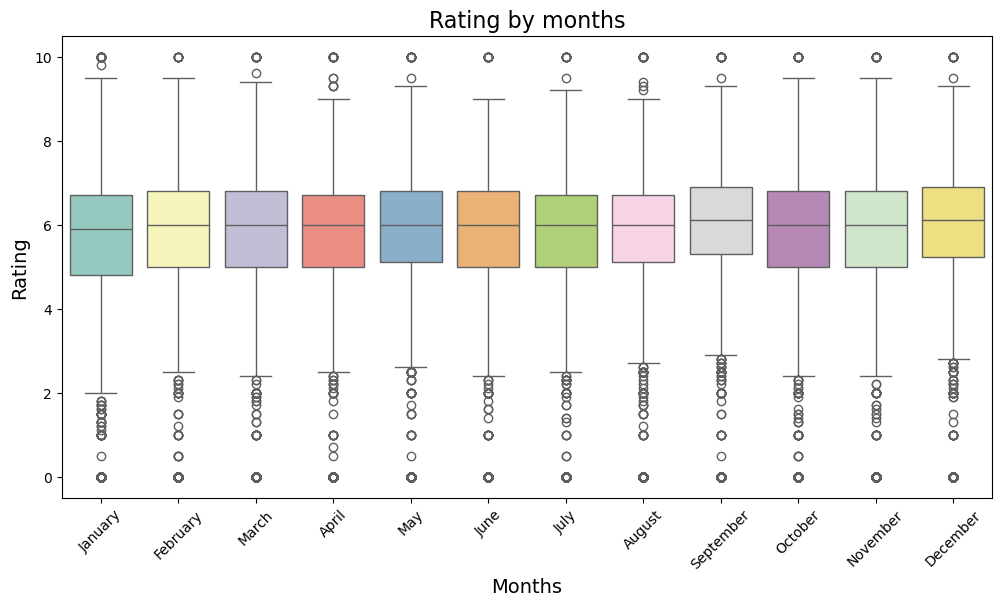

In [36]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

movies_metadata['month'] = pd.Categorical(movies_metadata['month'], 
                                          categories=month_order, 
                                          ordered=True)
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies_metadata, x='month', y='vote_average', order=month_order, palette='Set3')

plt.title("Rating by months", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Rating", fontsize=14)

plt.xticks(rotation=45)
plt.show()

Next, let's look at the profit by month and by day of the week

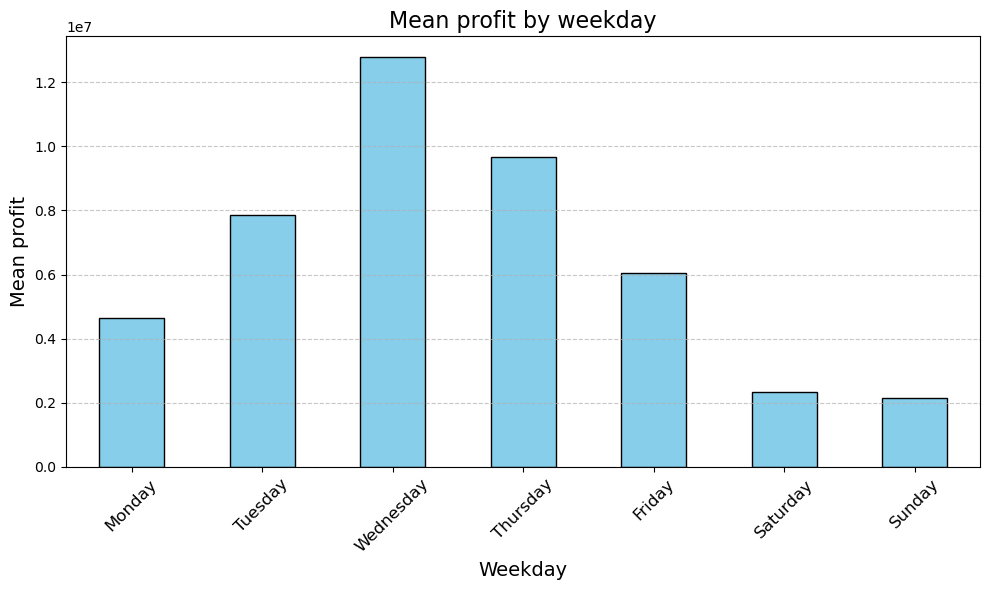

In [39]:
average_revenue_by_weekday = movies_metadata.groupby('weekday')['profit'].mean()

plt.figure(figsize=(10, 6))
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

average_revenue_by_weekday = average_revenue_by_weekday.reindex(days_order)
average_revenue_by_weekday.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Mean profit by weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Mean profit', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/var/folders/4w/760gzfq90fdb0dxy37stm58w0000gn/T/ipykernel_25469/2932376585.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_revenue_by_month = movies_metadata.groupby('month')['revenue'].mean()


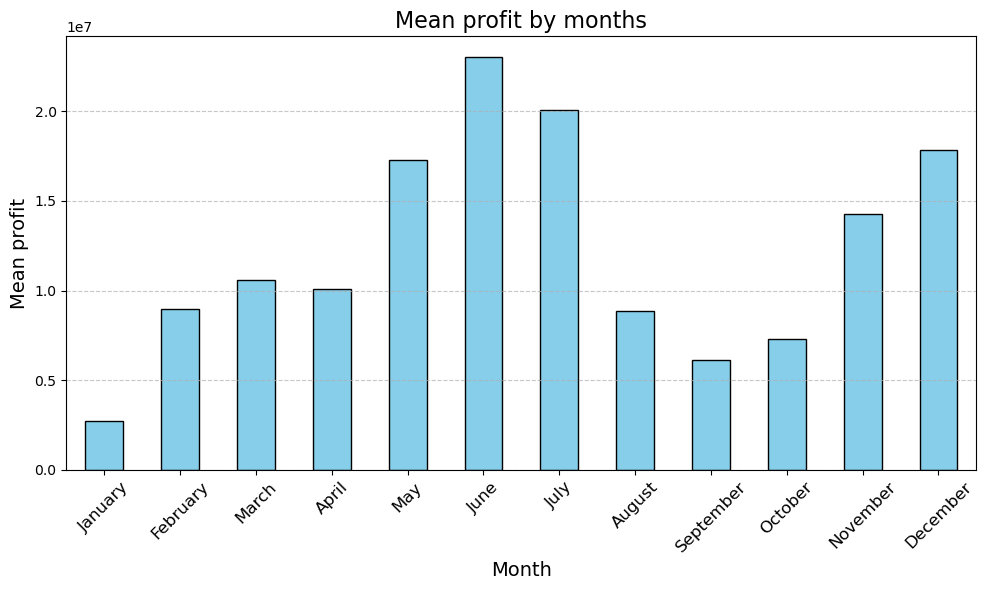

In [41]:

average_revenue_by_month = movies_metadata.groupby('month')['revenue'].mean()

plt.figure(figsize=(10, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

average_revenue_by_month = average_revenue_by_month.reindex(month_order)
average_revenue_by_month.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Mean profit by months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean profit', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The profit of the films that were released on Wednesday is really higher. 
Let's put forward a hypothesis - films released on Wednesday make a big profit. 
Let's put forward a null hypothesis - the profit of films released on Wednesday and on other days does not differ. 
Let's check this using p-value

In [44]:
wednesday_profit = movies_metadata[movies_metadata['weekday'] == 'Wednesday']['profit']
other_days_profit = movies_metadata[movies_metadata['weekday'] != 'Wednesday']['profit']

In [46]:
from scipy.stats import ttest_ind
stat, p_value = ttest_ind(wednesday_profit, other_days_profit, equal_var=False)
p_value

1.202668735908162e-13

Therefore, the null hypothesis is rejected and our main hypothesis is confirmed.

This conclusion is very useful for the film business. 
After all, by releasing the film on Wednesday, we can expect a big profit. 
Perhaps this may be due to the fact that it is convenient for people to go to a movie after work, 
because Wednesday is the middle of the week and by the end of the week people have more and more working hours.